Task 3: 
- Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.
- Calculate the percentage of restaurants in each price range category.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

# Load the data
df = pd.read_csv('/Users/tilakpatel/Personel/Cognifyz intern/code/Data/Dataset.csv', encoding='utf-8')
df = df.dropna(subset=['Cuisines'])

In [3]:
df_price_distribution = df.copy()


In [4]:
exchange_rates = {
    'Indian Rupees(Rs.)': 0.0117,
    'Dollar($)': 1,
    'Pounds(��)': 1.2409,
    'Brazilian Real(R$)': 0.1923,
    'Emirati Diram(AED)': 0.2722,
    'Rand(R)': 0.0541,
    'NewZealand($)': 0.5587,
    'Turkish Lira(TL)': 0.0364,
    'Botswana Pula(P)': 0.0741,
    'Indonesian Rupiah(IDR)': 0.000067,
    'Qatari Rial(QR)': 0.2747,
    'Sri Lankan Rupee(LKR)': 0.0031,
}

In [5]:
df_price_distribution['Average Cost for two (USD)'] = df_price_distribution.apply(lambda x: x['Average Cost for two'] * exchange_rates[x['Currency']], axis=1)


In [6]:
df_plot = pd.DataFrame(df_price_distribution.groupby('Price range')['Restaurant ID'].size())

In [7]:
df_plot = df_plot.rename(columns={'Restaurant ID': 'Count'})

In [8]:
df_plot['Percentage_of_restaurants'] = ((df_plot['Count'] / len(df))*100).round(1)

In [9]:
df_legend = pd.DataFrame({
    'Rating': [1, 2, 3, 4],
    'Range': ['0 - 20', '21 - 50', '51 - 100', '101 or above']
})

In [11]:
df_plot

,Count,Percentage_of_restaurants
Price range,,
1,4438,46.5
2,3113,32.6
3,1405,14.7
4,586,6.1


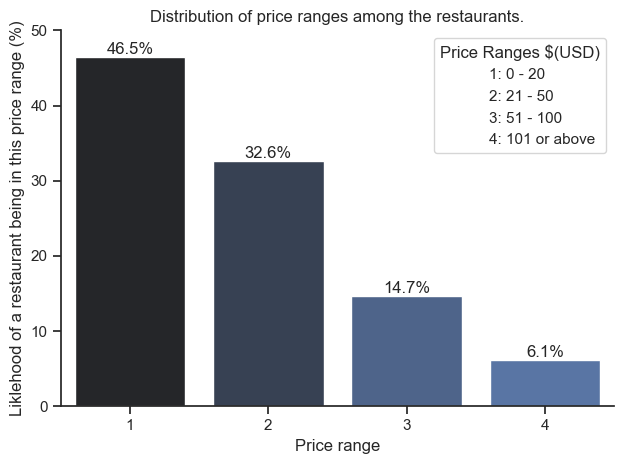

In [17]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x=df_plot.index, y='Percentage_of_restaurants', hue='Count', palette='dark:b_r')

custom_legend_labels = [
    f"{row['Rating']}: {row['Range']}" for _, row in df_legend.iterrows()
]
handles = [mlines.Line2D([], [], color='none') for _ in custom_legend_labels]
plt.legend(handles, custom_legend_labels, title="Price Ranges $(USD)", loc="upper right")
plt.title('Distribution of price ranges among the restaurants.')
plt.xlabel('Price range')
plt.ylim(0, 50)
plt.ylabel('Liklehood of a restaurant being in this price range (%)')
for i, value in enumerate(df_plot['Percentage_of_restaurants']):
    plt.text(i, df_plot['Percentage_of_restaurants'].iloc[i], f'{value}%', ha='center', va='bottom')
sns.despine()
plt.tight_layout()
plt.show()
